# Objective

* Perform LDA for renter survey data
* LDA used for topic modeling in natural language processing.
  * It assumes that documents are mixtures of topics, and each topic is a distribution over words.
  * we will use LDA on the open response field (Q36) so that we can identify key drivers of renter satisfaction

# Import Necessary Libraries

In [1]:
import io
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np


# Loading and Reading File



In [3]:
from google.colab import files # Googles way of importing files
uploaded = files.upload()

Saving 2023 Renter Survey Data.csv to 2023 Renter Survey Data.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['2023 Renter Survey Data.csv']))

In [5]:
data = df

# Data Pre-Processing for LDA

In [6]:
# Extracting the 'Q36' column and dropping empty rows
  # 'Q36' is the question / field in the df that contains textual free-response data
q36_data = data['Q36'].dropna()

# Convert the Series to a list of strings
  # This conversion is necessary because text vectorization requires input data to be in a list format where each element is a string of text to be analyzed.
q36_text_data = q36_data.tolist()

# Preprocessing the text data
vectorizer = CountVectorizer(stop_words='english', max_df=0.85, min_df=3, ngram_range=(1, 2), max_features=1000)

  # CountVectorizer: initilaized to turns text into a numerical format (specifically, a sparse matrix of token counts) that ML models can work with, by tokenizing texts, building a vocabulary, and counting how often each word appears.
  # stop_words: removes common english words that will probably not contain meaningful data
  # max_df: Excludes terms that appear in more than 85% of the documents
  # min_df: Excludes terms that appear in fewer than 3 documents since these terms are too rare to be significant for most topics
  # ngram_range: Considers both unigrams (single words) and bigrams (pairs of consecutive words) in the analysis
  # max_features: Limits number of features (unique terms) to the 1000 most frequent ones to manage computational complexity

# verctorizer.fit_transform learns the vocabulary of the text data and transforms it into a matrix of token counts, which is the input for the LDA model.
transformed_data = vectorizer.fit_transform(q36_text_data)


# Defining the number of topics the model will attempt to identify
n_topics = 5

In [7]:
# Applying Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(transformed_data)

# Function to display formatted topics as sentences
def format_topics_sentences(lda_model, feature_names, n_top_words):
    formatted_sentences = []
    for topic_idx, topic in enumerate(lda_model.components_):
        # Extract the top words for each topic
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        # Create a formatted sentence
        sentence = f"Topic {topic_idx + 1}: Issues related to {' '.join(top_words)}."
        formatted_sentences.append(sentence)
    return formatted_sentences

# Number of top words to display for each topic
n_top_words = 10

# Generate formatted topic sentences
formatted_sentences = format_topics_sentences(lda, vectorizer.get_feature_names_out(), n_top_words)

# Output the formatted topics as sentences
for sentence in formatted_sentences:
    print(sentence)


Topic 1: Issues related to housing staff maintenance broken message office make like communication problem.
Topic 2: Issues related to people new rent rubbish car door don housing management residents.
Topic 3: Issues related to good tenants housing building fixed hf place tenant issues years.
Topic 4: Issues related to housing car issues neighbours problems just tenants hf maintenance property.
Topic 5: Issues related to housing building time don residents living little apartment manager tenants.


# The following are key drivers of resident satisfaction according to our LDA model

* Topic 1: Issues related to housing staff maintenance broken message office make like communication problem.

* Topic 2: Issues related to people new rent rubbish car door don housing management residents.

* Topic 3: Issues related to good tenants housing building fixed hf place tenant issues years.

* Topic 4: Issues related to housing car issues neighbours problems just tenants hf maintenance property.

* Topic 5: Issues related to housing building time don residents living little apartment manager tenants.

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Assuming 'formatted_sentences' contains your topics formatted as sentences
topics_data = {
    "Topic Number": [f"Topic {i+1}" for i in range(len(formatted_sentences))],
    "Description": formatted_sentences
}

# Create a DataFrame
topics_df = pd.DataFrame(topics_data)

# Display the DataFrame
topics_df

,Topic Number,Description
0,Topic 1,Topic 1: Issues related to housing staff maintenance broken message office make like communication problem.
1,Topic 2,Topic 2: Issues related to people new rent rubbish car door don housing management residents.
2,Topic 3,Topic 3: Issues related to good tenants housing building fixed hf place tenant issues years.
3,Topic 4,Topic 4: Issues related to housing car issues neighbours problems just tenants hf maintenance property.
4,Topic 5,Topic 5: Issues related to housing building time don residents living little apartment manager tenants.


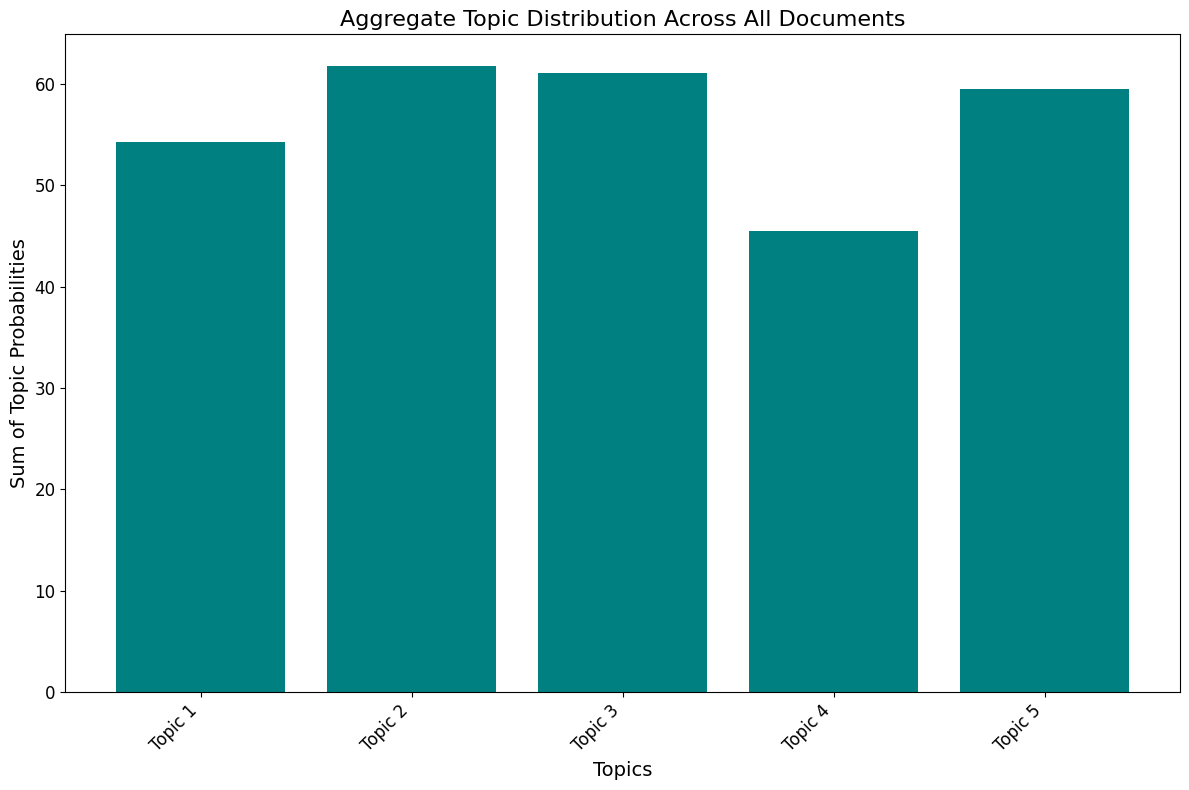

In [13]:
# Creating a Bar Chart to visualize prevalence of topics in 'Q36' column

# Transform the document-term matrix to get the topic distribution for documents
doc_topic_distributions = lda.transform(transformed_data)

# Sum the topic distributions to get an overall distribution across all documents
topic_distribution_sum = np.sum(doc_topic_distributions, axis=0)

# Generate labels for each topic based on your formatted topic sentences
# Since you've already created formatted sentences for each topic:
topic_labels = [f"Topic {i+1}" for i in range(len(formatted_sentences))]

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(topic_labels, topic_distribution_sum, color='teal')
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Sum of Topic Probabilities', fontsize=14)
plt.title('Aggregate Topic Distribution Across All Documents', fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

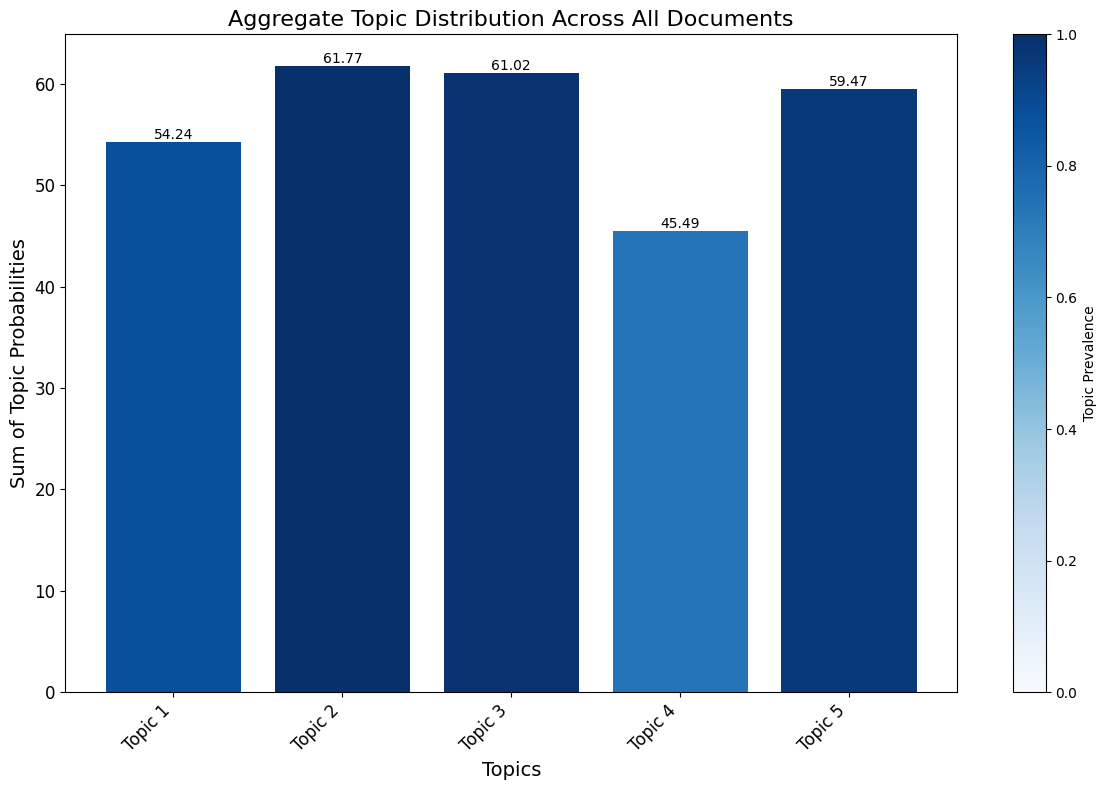

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the rest of your setup is the same as before

# Normalize the topic distribution sums to range between 0 and 1
normalized_values = topic_distribution_sum / np.max(topic_distribution_sum)

# Generate a gradient of blue colors
colors = plt.cm.Blues(normalized_values)

# Create the bar chart with gradient colors
plt.figure(figsize=(12, 8))
bars = plt.bar(topic_labels, topic_distribution_sum, color=colors)
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Sum of Topic Probabilities', fontsize=14)
plt.title('Aggregate Topic Distribution Across All Documents', fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.colorbar(plt.cm.ScalarMappable(cmap='Blues'), ax=plt.gca(), orientation='vertical', label='Topic Prevalence')
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

# Optionally, add the exact values on top of each bar for clarity
for bar, value in zip(bars, topic_distribution_sum):
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}',
                 ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


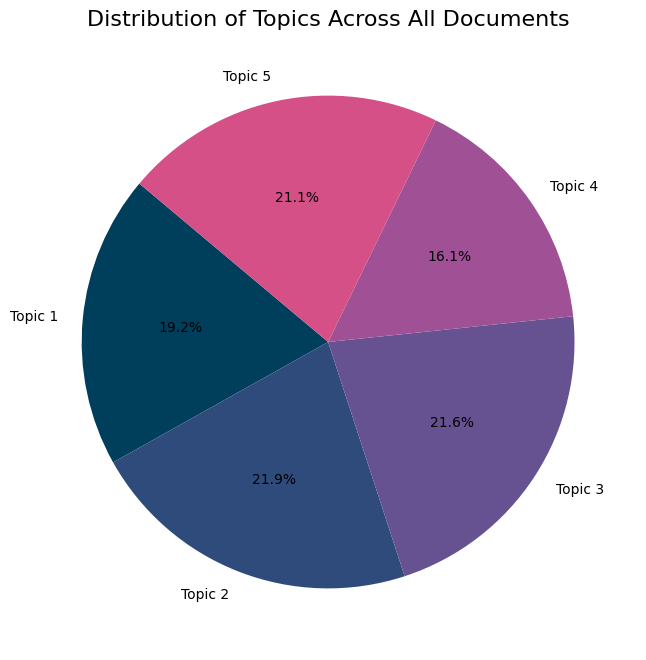

In [ ]:
# Creating a Pie Chart to visualize prevalence of topics in 'Q36' column

# Define a palette of different shades of blue
blue_shades = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']

# Make sure we have enough colors, repeat the color list if necessary
if len(topic_distribution_sum) > len(blue_shades):
    blue_shades = blue_shades * (len(topic_distribution_sum) // len(blue_shades) + 1)

# Create the pie chart using the blue color palette
plt.figure(figsize=(10, 8))
plt.pie(topic_distribution_sum, labels=topic_labels, autopct='%1.1f%%', startangle=140, colors=blue_shades)
plt.title('Distribution of Topics Across All Documents', fontsize=16)

# Show the plot
plt.show()